# CNN Classification - Keras - Working with image files

We will predict the category of a fruit image.

In [5]:
#from __future__ import print_function
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

# Image Readers

In [6]:
from tqdm import tqdm
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
# if the above library is missing, run conda install -c conda-forge tensorflow-datasets in terminal

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator

image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

training_generator = image_generator.\
    flow_from_directory('ImageData/FRUITS/Apples', 
    target_size=(32, 32), 
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb',
    subset="training")

validation_generator = image_generator.\
    flow_from_directory('ImageData/FRUITS/Apples', 
    target_size=(32, 32), 
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb',
    subset="validation")

first_batch = validation_generator[0]
images, labels = first_batch

Found 3879 images belonging to 10 classes.
Found 965 images belonging to 10 classes.


Let's explore the image files. ImageDataGenerator contains batches whose size was set in the batch_size parameter, let's display the first batch

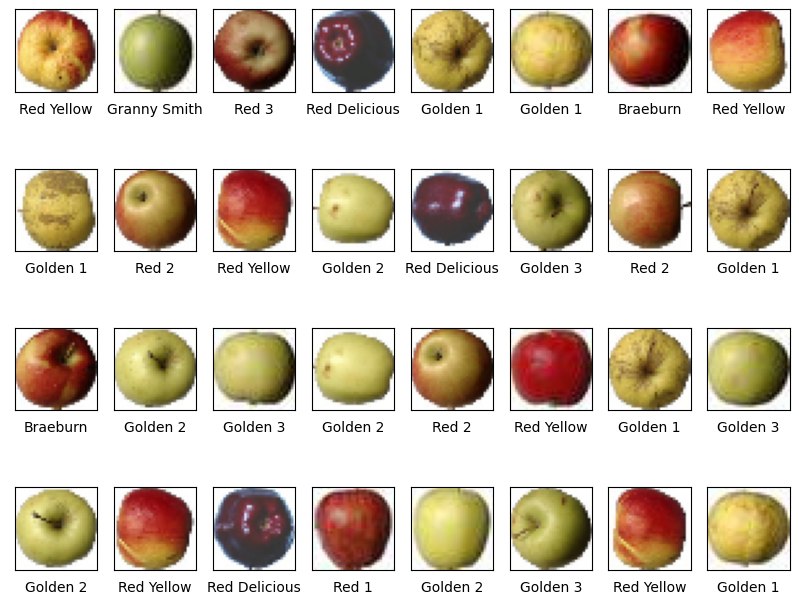

In [8]:
import matplotlib.pyplot as plt

# get all the classes of apples found in the data
training_labels = list(training_generator.class_indices.keys())

# get the first batch of images and associated labels
first_batch = training_generator[0]
images, labels = first_batch

# get the size of the batch
batch_size = len(first_batch[1])

# do some calculations to accomodate the number of images (which is determined by the batch size)
cols = 8
rows = batch_size//cols+1

# display the images
plt.figure(figsize=(10,10))
for i in range(batch_size):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(training_labels[int(np.argmax(labels[i]))])
plt.show()

# Model

```python
Default options for Conv2D:

tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)
```

In [9]:
model = Sequential()
# Add convolutional layer. Learn 16 filters using a 3x3 kernel
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))

# Add convolutional layer. Learn 32 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))

# Flatten to a 1d array for feeding into our dense layer
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))

# Add the final prediction later with 10 neurons, one for each class
model.add(Dense(10, activation='softmax'))

In [10]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#train the model

tensorboard_callback = tf.keras.callbacks.TensorBoard('logs/apple_model', histogram_freq=1)

history = model.fit(training_generator, validation_data=(validation_generator), epochs=50, callbacks=[tensorboard_callback])

Epoch 1/50
122/122 [==============================] - 6s 42ms/step - loss: 1.5260 - accuracy: 0.4297 - val_loss: 1.0378 - val_accuracy: 0.7617
Epoch 2/50
122/122 [==============================] - 4s 36ms/step - loss: 0.6022 - accuracy: 0.7760 - val_loss: 1.0222 - val_accuracy: 0.7337
Epoch 3/50
122/122 [==============================] - 4s 36ms/step - loss: 0.3491 - accuracy: 0.8747 - val_loss: 0.9787 - val_accuracy: 0.7347
Epoch 4/50
122/122 [==============================] - 5s 42ms/step - loss: 0.2569 - accuracy: 0.9090 - val_loss: 1.2448 - val_accuracy: 0.7347
Epoch 5/50
122/122 [==============================] - 6s 51ms/step - loss: 0.2039 - accuracy: 0.9221 - val_loss: 1.0404 - val_accuracy: 0.8352
Epoch 6/50
122/122 [==============================] - 6s 45ms/step - loss: 0.1828 - accuracy: 0.9319 - val_loss: 1.0035 - val_accuracy: 0.8249
Epoch 7/50
122/122 [==============================] - 4s 37ms/step - loss: 0.1485 - accuracy: 0.9477 - val_loss: 1.1631 - val_accuracy: 0.8259

# Summarize the model and it's performance

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

validation_unshuffled = image_generator.\
    flow_from_directory('ImageData/FRUITS/Apples', 
    target_size=(32, 32), 
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb',
    subset="validation")

num_of_test_samples = validation_unshuffled.n

#Confution Matrix and Classification Report
Y_pred = model.predict(validation_unshuffled, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

#target_names = ['Cats', 'Dogs', 'Horse']
target_names = list(training_generator.class_indices.keys())
print(classification_report(validation_unshuffled.classes, y_pred, target_names=target_names, digits=4))

Found 965 images belonging to 10 classes.
31/31 [==============================] - 1s 26ms/step
               precision    recall  f1-score   support

     Braeburn     0.5939    1.0000    0.7452        98
     Golden 1     0.5799    1.0000    0.7341        98
     Golden 2     1.0000    1.0000    1.0000        98
     Golden 3     1.0000    1.0000    1.0000        96
 Granny Smith     1.0000    1.0000    1.0000        98
        Red 1     1.0000    1.0000    1.0000        98
        Red 2     1.0000    0.3163    0.4806        98
        Red 3     1.0000    1.0000    1.0000        85
Red Delicious     1.0000    1.0000    1.0000        98
   Red Yellow     1.0000    0.2755    0.4320        98

     accuracy                         0.8570       965
    macro avg     0.9174    0.8592    0.8392       965
 weighted avg     0.9161    0.8570    0.8367       965



31/31 [==============================] - 1s 24ms/step


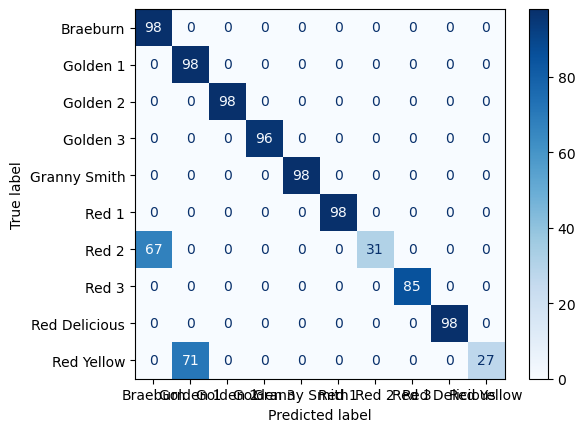

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# display the confusion matrix
y_test = validation_unshuffled.classes
y_pred = model.predict(validation_unshuffled).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Predict a single image

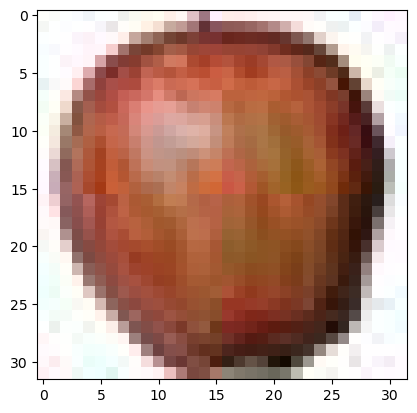

In [16]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt

img = load_img(
    "ImageData/FRUITS/Test_10/Apple Red 1/3_100.jpg",
    color_mode='rgb',
    target_size=(32,32)
)

plt.imshow(img)

In [17]:
#Convert the image to array
single_image = img_to_array(img)

#divide the image values by 255 to normalize
img_rank4 = np.expand_dims(single_image/255, axis=0)

#generate preduction using our model
model.predict(img_rank4)

1/1 [==============================] - 0s 76ms/step


array([[2.4158843e-13, 1.0022817e-18, 1.6897197e-22, 9.6975619e-27,
        9.4217679e-22, 9.9999952e-01, 1.9928395e-13, 3.0309899e-09,
        5.2411286e-07, 1.0840627e-09]], dtype=float32)

In [18]:
#since the output above is difficult to read, let's round
np.round(model.predict(img_rank4),2)

1/1 [==============================] - 0s 27ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [19]:
# Now, we need to find the index where the prediction array is 1
np.argmax(model.predict(img_rank4), axis=-1)

1/1 [==============================] - 0s 25ms/step


array([5], dtype=int64)

In [20]:
# To get the label, we need to get the class indices from the training generator
label_map = (training_generator.class_indices)
label_map

{'Braeburn': 0,
 'Golden 1': 1,
 'Golden 2': 2,
 'Golden 3': 3,
 'Granny Smith': 4,
 'Red 1': 5,
 'Red 2': 6,
 'Red 3': 7,
 'Red Delicious': 8,
 'Red Yellow': 9}

In [21]:
# Now, we can use our prediction and get the class label from the class indices:
list(label_map.keys())[np.argmax(model.predict(img_rank4), axis=-1)[0]]

1/1 [==============================] - 0s 27ms/step


'Red 1'

Outr model predicted "Red 1" which is correct!